this soal is "بدیهیه"( but not in pytorch)

# libraries and data_processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=56, stratify=y)

print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (1437, 64)
y_train.shape: (1437,)
X_test.shape: (360, 64)
y_test.shape: (360,)


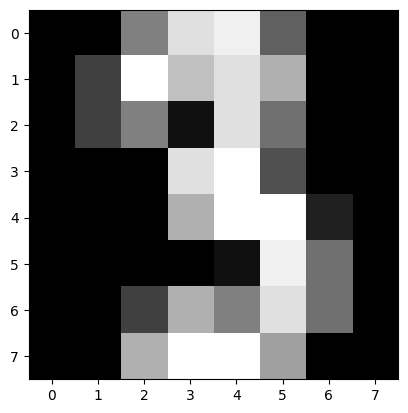

3


In [3]:
plt.imshow(X_train[56].reshape(8, 8), cmap='gray')
plt.show()
print(y_train[56])

# appling models

In [4]:
from sklearn.metrics import f1_score

In [5]:
# Random-Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

clf = RandomForestClassifier(random_state=56)

scores = cross_val_score(clf, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=56), scoring="f1_macro")
print(f"cv f1_macro mean: {scores.mean()}")
print(f"cv f1_macro scores: {scores}")

cv f1_macro mean: 0.9759477318737677
cv f1_macro scores: [0.97494675 0.97205254 0.98036567 0.97468343 0.97769027]


In [6]:
import torch
import torch.nn as nn

In [30]:
# NeuralNet
class numberNN(nn.Module):
    def __init__(self, input):
        super().__init__()
        self.fc1 = nn.Linear(input, 32)
        self.fc2 = nn.Linear(32, 10)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)

        return x

model = numberNN(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [32]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [33]:
def model_training(epochs=10):
    print("The metric is f1_score")
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        
        model.eval()
        all_train_preds, all_train_labels = [], []
        all_test_preds, all_test_labels = [], []
        
        with torch.no_grad():
            for X_batch, y_batch in train_loader:
                preds = torch.argmax(model(X_batch), dim=1)
                all_train_preds.extend(preds.numpy())
                all_train_labels.extend(y_batch.numpy())
                
            for X_batch, y_batch in test_loader:
                preds = torch.argmax(model(X_batch), dim=1)
                all_test_preds.extend(preds.numpy())
                all_test_labels.extend(y_batch.numpy())
        
        f1_train = f1_score(all_train_labels, all_train_preds, average="macro")
        f1_val = f1_score(all_test_labels, all_test_preds, average="macro")
        
        print(f"epoch: {epoch+1},  Loss: {avg_loss:.4f},  Train: {f1_train:.4f},  Test: {f1_val:.4f}")

In [34]:
model_training(30)

The metric is f1_score
epoch: 1,  Loss: 2.0633,  Train: 0.7243,  Test: 0.7516
epoch: 2,  Loss: 1.5387,  Train: 0.8140,  Test: 0.8192
epoch: 3,  Loss: 1.0736,  Train: 0.8835,  Test: 0.8790
epoch: 4,  Loss: 0.8001,  Train: 0.9117,  Test: 0.9199
epoch: 5,  Loss: 0.6148,  Train: 0.9282,  Test: 0.9225
epoch: 6,  Loss: 0.5136,  Train: 0.9395,  Test: 0.9279
epoch: 7,  Loss: 0.4491,  Train: 0.9443,  Test: 0.9389
epoch: 8,  Loss: 0.3901,  Train: 0.9526,  Test: 0.9415
epoch: 9,  Loss: 0.3423,  Train: 0.9574,  Test: 0.9441
epoch: 10,  Loss: 0.3268,  Train: 0.9644,  Test: 0.9495
epoch: 11,  Loss: 0.2924,  Train: 0.9651,  Test: 0.9468
epoch: 12,  Loss: 0.2790,  Train: 0.9686,  Test: 0.9495
epoch: 13,  Loss: 0.2447,  Train: 0.9749,  Test: 0.9523
epoch: 14,  Loss: 0.2483,  Train: 0.9777,  Test: 0.9578
epoch: 15,  Loss: 0.2330,  Train: 0.9784,  Test: 0.9551
epoch: 16,  Loss: 0.2305,  Train: 0.9833,  Test: 0.9578
epoch: 17,  Loss: 0.2043,  Train: 0.9847,  Test: 0.9523
epoch: 18,  Loss: 0.2041,  Train: 